<a href="https://colab.research.google.com/github/mokhs000/2020-2-AI/blob/master/code/05_minist_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# mnist 모듈 준비
mnist = tf.keras.datasets.mnist

# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0


# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')                                     
])

# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 표시
model.summary()

# 모델을 훈련 데이터로 총 10번 훈련
model.fit(x_train, y_train, epochs=10)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2984 - accuracy: 0.9122
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1437 - accuracy: 0.9571
Epoch 3/10
1875/1875 [====================

[0.06999242305755615, 0.9801999926567078]

In [ ]:
print(x_test[:1].shape)

pred_result = model.predict(x_test[:1])
print(pred_result.shape)
print(pred_result)
print(pred_result[0])

(1, 28, 28)
(1, 10)
[[1.7882265e-09 1.6124742e-09 1.2074645e-08 1.3041457e-06 3.2850184e-14
  9.9730268e-10 2.0647423e-14 9.9999869e-01 3.0980103e-09 5.1875503e-08]]
[1.7882265e-09 1.6124742e-09 1.2074645e-08 1.3041457e-06 3.2850184e-14
 9.9730268e-10 2.0647423e-14 9.9999869e-01 3.0980103e-09 5.1875503e-08]


In [ ]:
import numpy as np

one_pred = pred_result[0]
print(one_pred.sum())

one = np.argmax(one_pred)
print(one)

1.0
7


In [ ]:
import numpy as np

one_pred = pred_result[0]
print(tf.reduce_sum(one_pred))
print(tf.reduce_sum(one_pred).numpy())

print(tf.argmax(one_pred).numpy())

tf.Tensor(1.0, shape=(), dtype=float32)
1.0
7


In [ ]:
import numpy as np

print(np.argmax([5,4,10,1,2]))
print(np.argmax([3,1,4,9,6,7,2]))
print(np.argmax([[0.1,0.8,0.1],[0.7,0.2,0.1],[0.2,0.1,0.7]],axis=1))


2
3
[1 0 2]


In [ ]:
import tensorflow as tf



print(tf.argmax([5,4,10,1,2]))
print(tf.argmax([3,1,4,9,6,7,2]))
print(tf.argmax([[0.1,0.8,0.1],[0.7,0.2,0.1],[0.2,0.1,0.7]],axis=1))

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor([1 0 2], shape=(3,), dtype=int64)


1.0
7


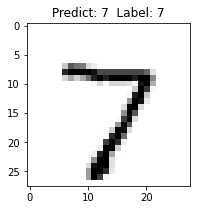

In [ ]:
import numpy as np

one_pred = pred_result[0]
print(one_pred.sum())

one = np.argmax(one_pred)
print(one)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
tmp = "Predict: " + str(one) + "  Label: " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[0],cmap='Greys')

In [ ]:
import numpy as np

x = np.array([2,3,254,5,6,3])
x= x/255.0

print(x)

x = x.reshape(2,3)
print(x)

x = x.flatten()
print(x)

[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]
[[0.00784314 0.01176471 0.99607843]
 [0.01960784 0.02352941 0.01176471]]
[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]


In [ ]:
data = np.arange(1,11).reshape(5,2).astype(np.float32)
print(data)
np.sum(data)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]


55.0

In [ ]:
tf.random.set_seed(0)
layer = tf.keras.layers.Dropout(.3,input_shape=(2,))
outputs = layer(data, training=True)

print(outputs)
np.sum(outputs)

tf.Tensor(
[[ 0.         0.       ]
 [ 4.285714   5.714286 ]
 [ 7.1428576  8.571428 ]
 [10.        11.428572 ]
 [12.857143   0.       ]], shape=(5, 2), dtype=float32)


60.0

In [ ]:
from random import sample
import numpy as np

pred_result = model.predict(x_test)
print(pred_result.shape)
print(pred_result[0])
print(np.argmax(pred_result[0]))

pred_labels = np.argmax(pred_result, axis=1)
print(pred_labels)

print(y_test)

(10000, 10)
[1.7882299e-09 1.6124710e-09 1.2074645e-08 1.3041445e-06 3.2850059e-14
 9.9730268e-10 2.0647423e-14 9.9999869e-01 3.0980103e-09 5.1875507e-08]
7
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [ ]:
from random import sample
import numpy as np

pred_result = model.predict(x_test)
pred_labes = np.argmax(pred_result, axis=1)
nrows, ncols = 5, 4
samples = sorted(sample(range(len(x_test)),nrows * ncols))

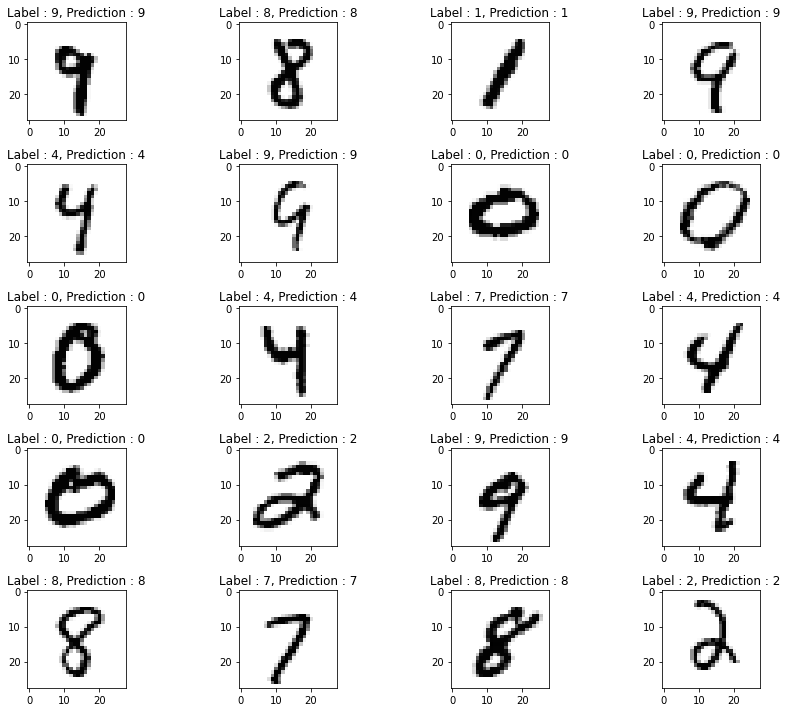

In [ ]:
count = 0
plt.figure(figsize=(12,10))
for n in samples :
  count += 1
  plt.subplot(nrows,ncols,count)
  cmap = 'Greys' if(pred_labels[n]==y_test[n]) else 'Blues'
  plt.imshow(x_test[n].reshape(28,28),cmap=cmap,interpolation='nearest')
  tmp = "Label : " + str(y_test[n]) + ", Prediction : " + str(pred_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()

In [ ]:
from random import sample
import numpy as np

mispred=[]

pred_result = model.predict(x_test)
pred_labels = np.argmax(pred_result,axis=1)

for n in range(0,len(y_test)):
  if pred_labels[n] != y_test[n]:
    mispred.append(n)
print("정답이 틀린 수", len(mispred))

samples = sample(mispred,20)
print(samples)

정답이 틀린 수 198
[8410, 1522, 2280, 381, 9808, 1901, 2329, 6632, 259, 2272, 956, 2454, 5888, 1952, 2939, 6651, 4536, 3976, 8279, 9749]


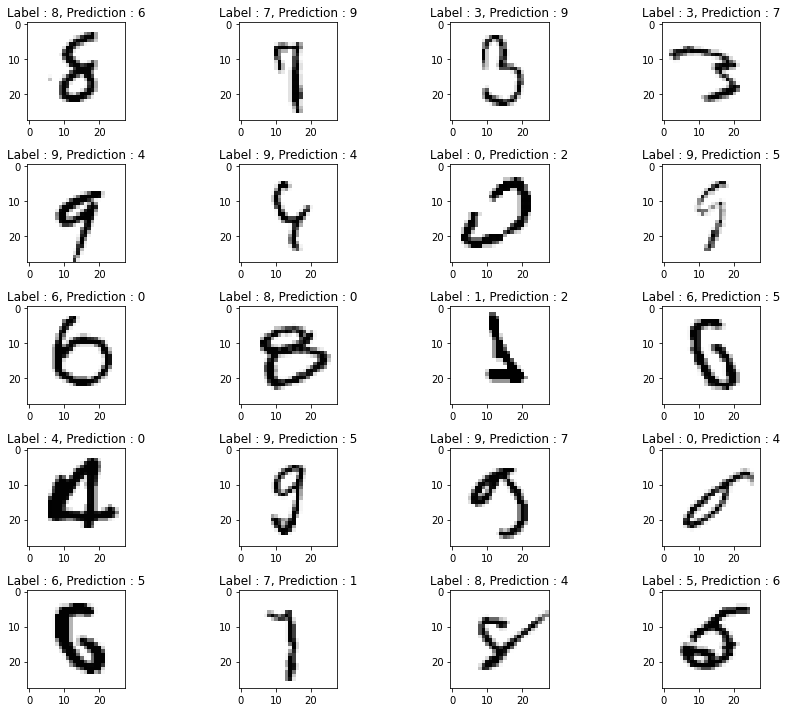

In [ ]:
count = 0
plt.figure(figsize=(12,10))
for n in samples :
  count += 1
  plt.subplot(nrows,ncols,count)
  
  plt.imshow(x_test[n].reshape(28,28),cmap = 'Greys',interpolation='nearest')
  tmp = "Label : " + str(y_test[n]) + ", Prediction : " + str(pred_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=20)

model.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

[0.0761759877204895, 0.9819999933242798]

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((60000,28*28))
x_test = x_test.reshape((10000,28*28))

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(128, activation='relu',input_shape=(28*28,)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')                                     
])

model.summary()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=10)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2902 - accuracy: 0.9160
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1397 - accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1063 - accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - lo

[0.07132308185100555, 0.9796000123023987]